In [56]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [57]:
%ls -ltrh /Users/laurentperrinet/quantic/grants/Polychronies/RSG-spikepatterns/Data/

total 2294920
-rw-r--r--  1 laurentperrinet  staff   211M Jun 14 10:42 H_Ready-Set_bin1ms_alignedReady.mat
-rw-r--r--  1 laurentperrinet  staff   407M Jun 14 10:55 G_Ready-Set_bin1ms_alignedReady.mat
-rw-r--r--@ 1 laurentperrinet  staff   2.0K Jun 15 12:29 README.md
-rw-r--r--@ 1 laurentperrinet  staff   183M Jun 27 15:52 G_Ready-Set_bin1ms_alignedReady_session=0.npz
-rw-r--r--@ 1 laurentperrinet  staff   212M Jun 27 15:52 G_Ready-Set_bin1ms_alignedReady_session=1.npz
-rw-r--r--@ 1 laurentperrinet  staff    17M Jun 27 15:52 H_Ready-Set_bin1ms_alignedReady_session=0.npz
-rw-r--r--@ 1 laurentperrinet  staff    68M Jun 27 15:52 H_Ready-Set_bin1ms_alignedReady_session=1.npz


In [58]:
# i_session = 0
# monkey = 'G'
# path = Path.home()/'quantic'/'grants'/'polychronies'/'RSG-spikepatterns'/'Data'/f'{monkey}_Ready-Set_bin1ms_alignedReady_session={i_session}.npy'
# data = np.load(path)
# N_time, N_neurons, N_trial = data.shape
# N_time, N_neurons, N_trial

In [59]:
i_session = 0
monkey = 'G'
path = Path.home()/'quantic'/'grants'/'polychronies'/'RSG-spikepatterns'/'Data'/f'{monkey}_Ready-Set_bin1ms_alignedReady_session={i_session}.npz'

dictdata = np.load(path)


In [60]:
data, id_neuron, id_short, t_s, t_p = dictdata['data'], dictdata['id_neuron'], dictdata['id_short'], dictdata['t_s'], dictdata['t_p']


transferring back the 255 into NaNs

In [61]:
data = data.astype(float)

In [62]:
data[data==255] = np.nan

In [63]:
N_time, N_neurons, N_trial = data.shape
N_time, N_neurons, N_trial

(1200, 107, 1498)

## displaying some raster plots

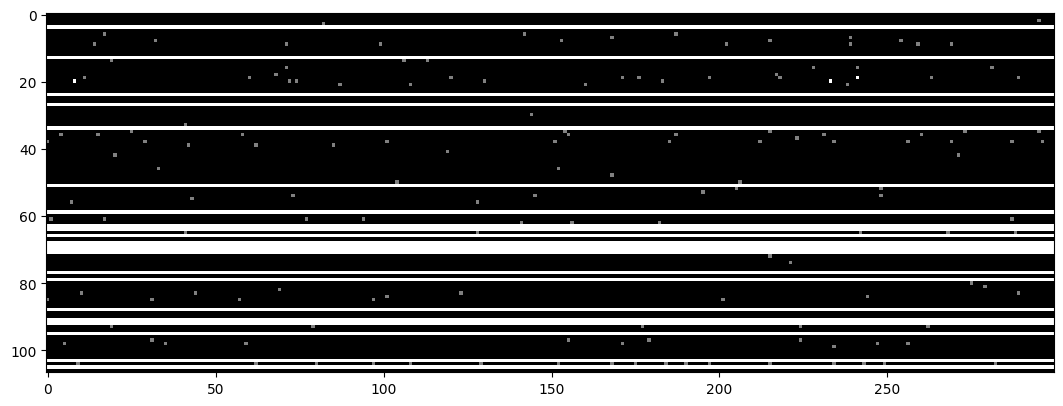

In [64]:
i_trial = 0
fig, ax = plt.subplots(figsize=(13, 8))
ax.imshow(data[:300, :, i_trial].T, cmap='gray');

In [25]:
print(i_session, np.mean(np.nanmean(data, axis=(0, 1))*1000), np.std(np.nanmean(data, axis=(0, 1))*1000))

0 2.839377737294586 0.8299818088877707


In [26]:
data_trimT = data[np.isnan(data[:, :, i_trial]).sum(axis=1)<N_neurons, :, i_trial]
data_trimT.shape

(1200, 107)

In [27]:
data_trim = data_trimT[:, np.isnan(data_trimT).sum(axis=0)==0]
data_trim.shape

(1200, 107)

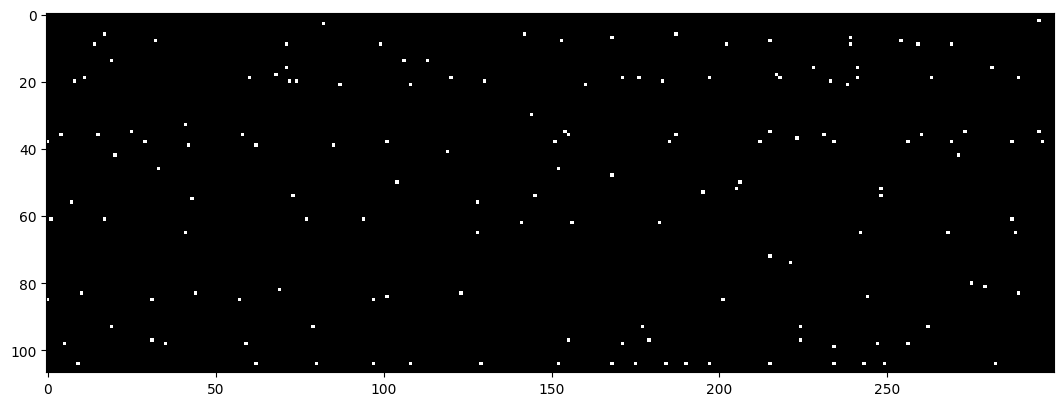

In [28]:
fig, ax = plt.subplots(figsize=(13, 8))
ax.imshow((data_trim>0)[:300, :].T, cmap='gray');

### checking we have the good t_s on each trial

In [29]:
for i_trial in range(N_trial):
    print('ts=', (np.isnan(data[:, :, i_trial]).sum(axis=1)<N_neurons).sum())
    if i_trial>10: break


ts= 1200
ts= 1200
ts= 1200
ts= 1200
ts= 1200
ts= 1200
ts= 1200
ts= 1200
ts= 1200
ts= 1200
ts= 1200
ts= 1200


In [30]:
active_neurons = np.isnan(data_trimT).sum(axis=0)==0
active_neurons

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

### computing some firing rates

In [35]:
t_s_max = int(t_s.max())

In [40]:
DeltaT = 100 # number of time bins on which we average
dt = 20 # temporal distance between points on which we compute the firing rate

timepoints = np.arange(DeltaT, t_s_max+1, dt)
N_timepoints = len(timepoints)
timepoints

array([ 100,  120,  140,  160,  180,  200,  220,  240,  260,  280,  300,
        320,  340,  360,  380,  400,  420,  440,  460,  480,  500,  520,
        540,  560,  580,  600,  620,  640,  660,  680,  700,  720,  740,
        760,  780,  800,  820,  840,  860,  880,  900,  920,  940,  960,
        980, 1000, 1020, 1040, 1060, 1080, 1100, 1120, 1140, 1160, 1180,
       1200])

In [51]:
fr = np.empty((N_timepoints, N_neurons, N_trial)) * np.nan
for i_timepoint, timepoint in enumerate(timepoints):
    fr[i_timepoint, :, :] = np.nansum(data[(timepoint-DeltaT):timepoint, :, :], axis=0) / (DeltaT/1000)

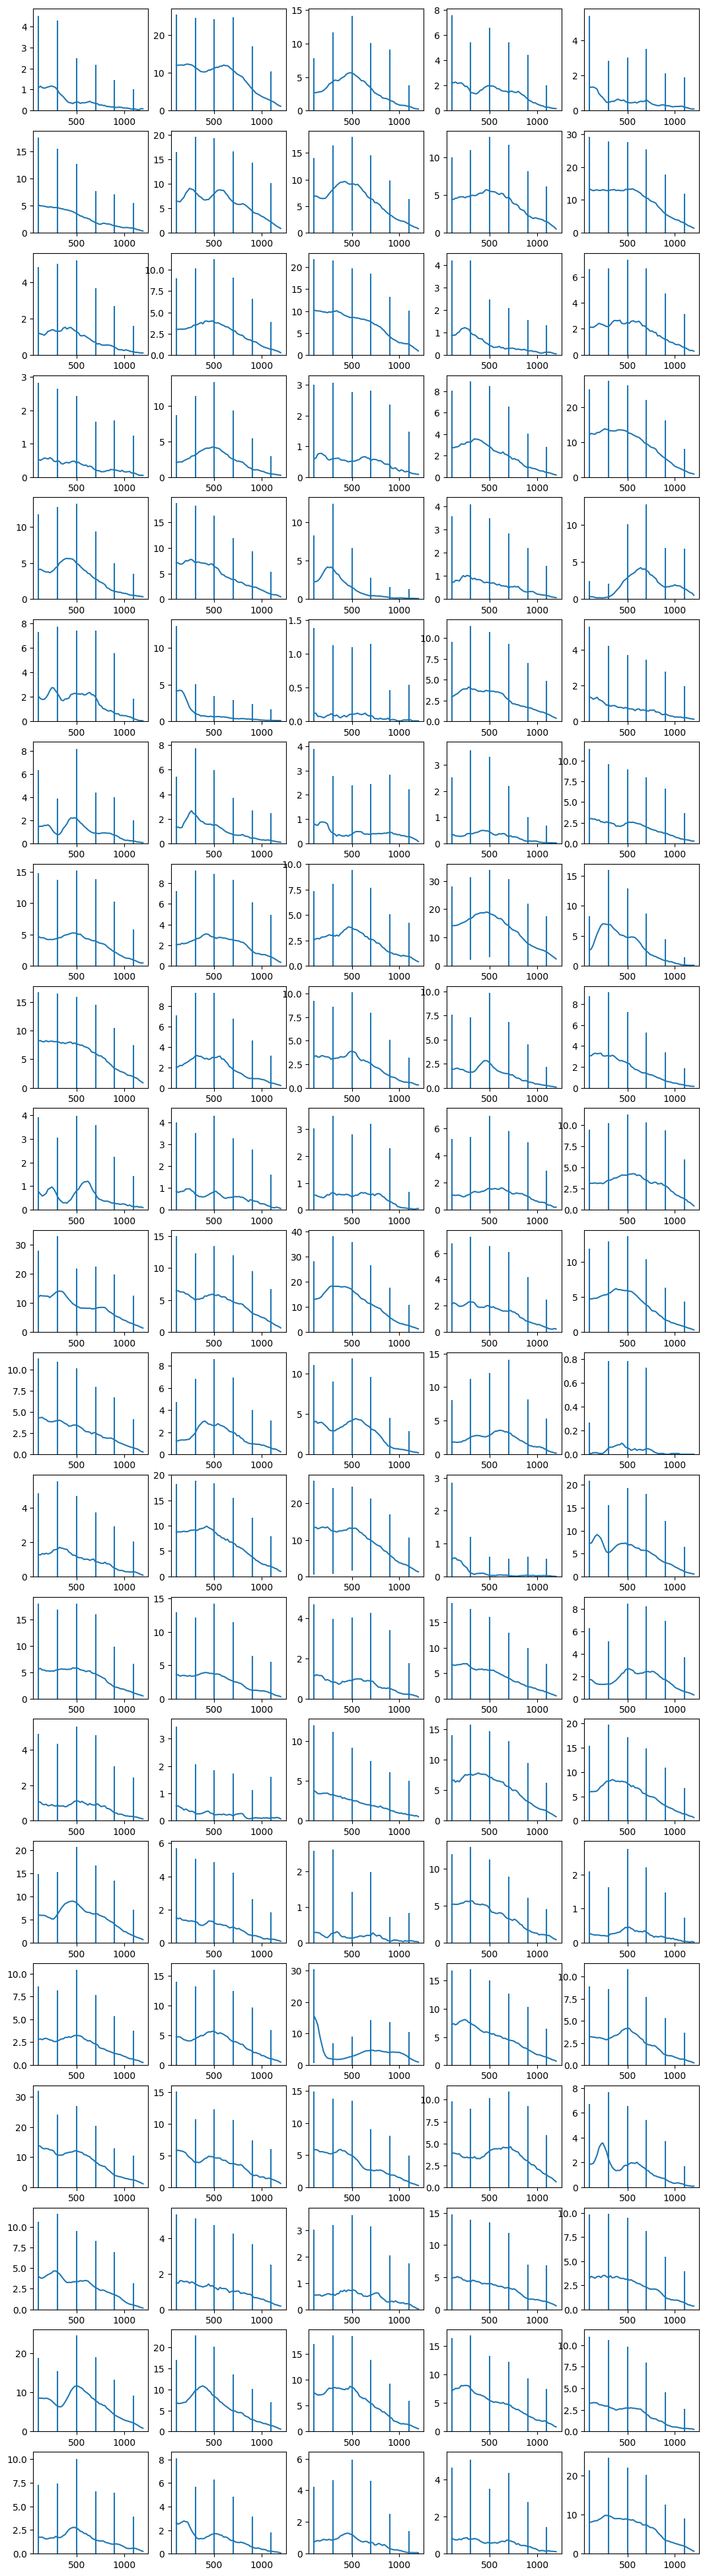

In [67]:
N_neurons_cols = int(np.sqrt(N_neurons)/2)
fig, axs = plt.subplots(N_neurons//N_neurons_cols, N_neurons_cols, figsize=(13, 5*N_neurons_sqrt))
for i_neuron, ax in enumerate(axs.ravel()):
    ax.errorbar(timepoints, np.nanmean(fr[:, i_neuron, :], axis=-1),
                yerr=np.nanstd(fr[:, i_neuron, :], axis=-1), errorevery=10)
    ax.set_ylim(0)

In [72]:
id_neurons = id_neuron[:, 0]
id_neurons = id_neurons.astype(int)
id_short, id_neurons


(array([False, False, False, ...,  True,  True,  True]),
 array([1002, 1003, 1004, 1019, 1020, 1029, 1034, 1035, 1042, 1046, 1053,
        1059, 1065, 1075, 1079, 1083, 1085, 1089, 1095, 1097, 1101, 1106,
        1107, 1110, 1111, 1112, 1113, 1116, 1118, 1121, 1122, 1123, 1124,
        1125, 1128, 1130, 2007, 2013, 2015, 2019, 2020, 2021, 2027, 2028,
        2029, 2030, 2038, 2041, 2042, 2058, 2063, 2068, 2071, 2075, 2078,
        2081, 2096, 2098, 2099, 2100, 2102, 2109, 2111, 2113, 2115, 2119,
        2123, 2125, 2127, 2130, 2132, 2133, 3001, 3004, 3011, 3012, 3014,
        3016, 3020, 3025, 3028, 3034, 3035, 3037, 3048, 3055, 3064, 3065,
        3068, 3074, 3086, 3090, 3099, 3100, 3101, 3102, 3103, 3104, 3107,
        3108, 3113, 3115, 3119, 3120, 3122, 3124, 3126]))

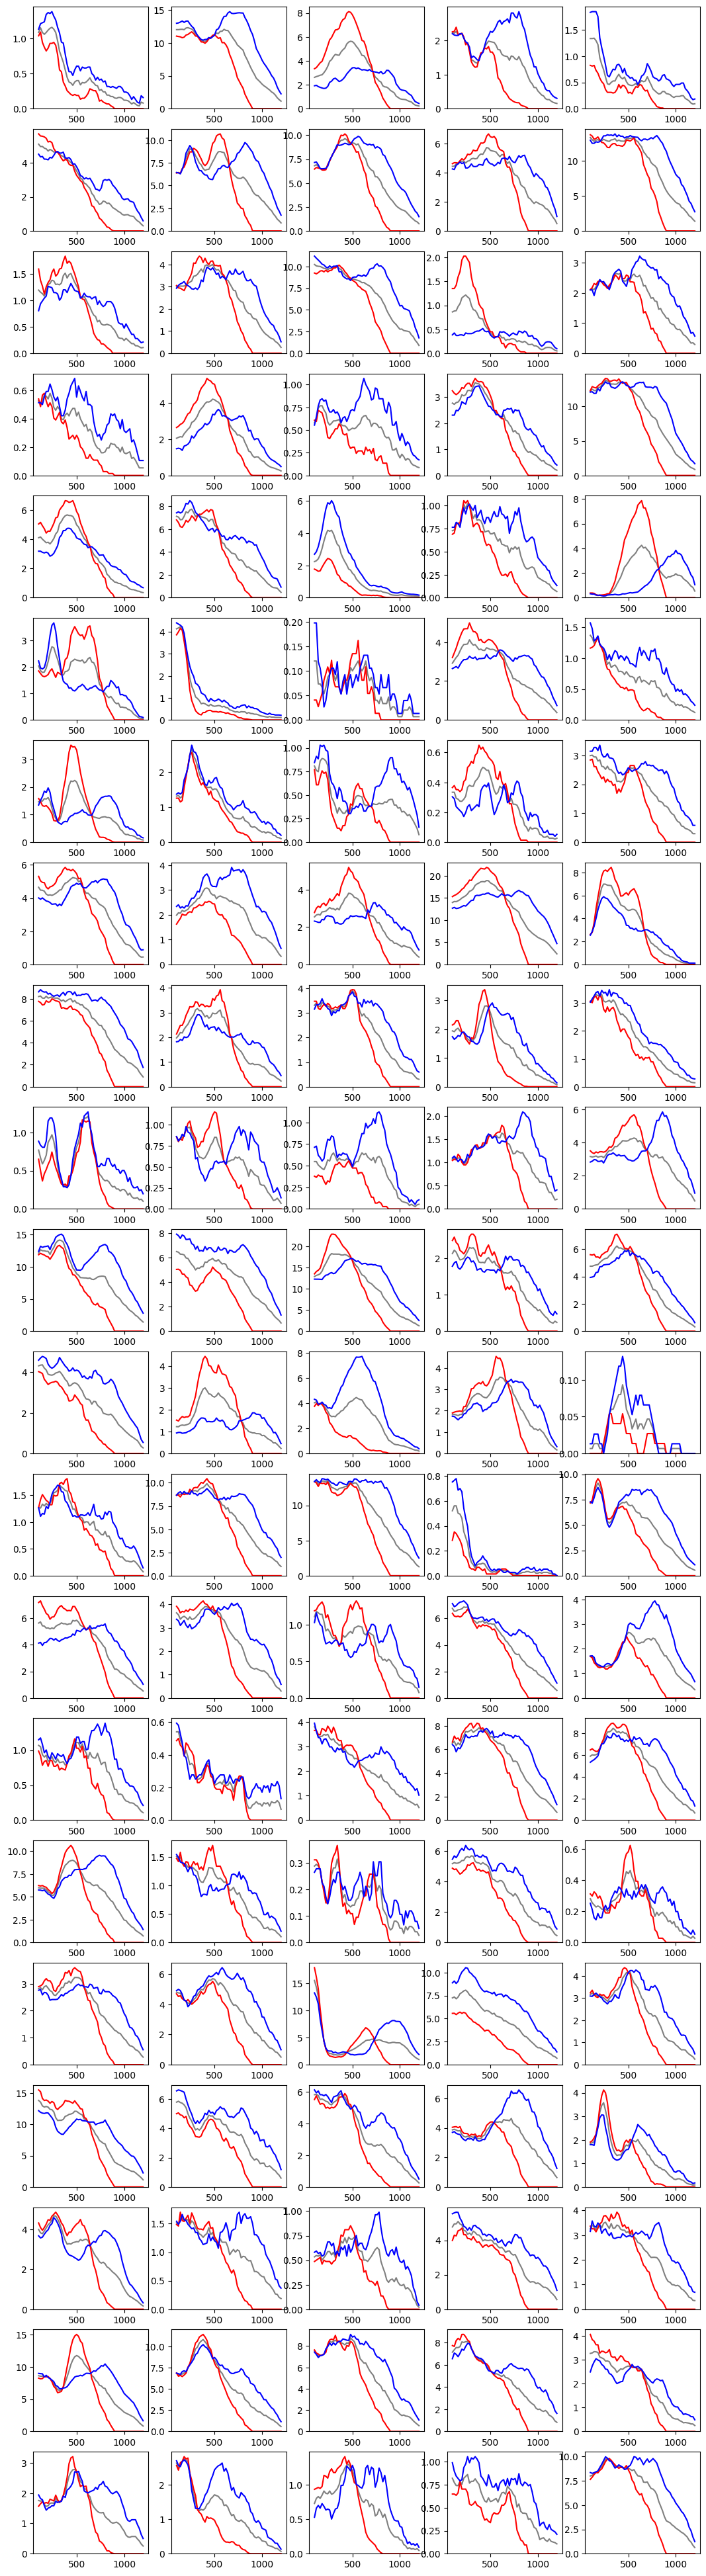

In [65]:
N_neurons_cols = int(np.sqrt(N_neurons)/2)
fig, axs = plt.subplots(N_neurons//N_neurons_cols, N_neurons_cols, figsize=(13, 5*N_neurons_sqrt))
for i_neuron, ax in enumerate(axs.ravel()):
    ax.plot(timepoints, np.$(fr[:, i_neuron, :], axis=-1), 'k', alpha=.5)
    ax.plot(timepoints, np.nanmean(fr[:, i_neuron, id_short==True], axis=-1), 'r')
    ax.plot(timepoints, np.nanmean(fr[:, i_neuron, id_short==False], axis=-1), 'b')
    ax.set_ylim(0)

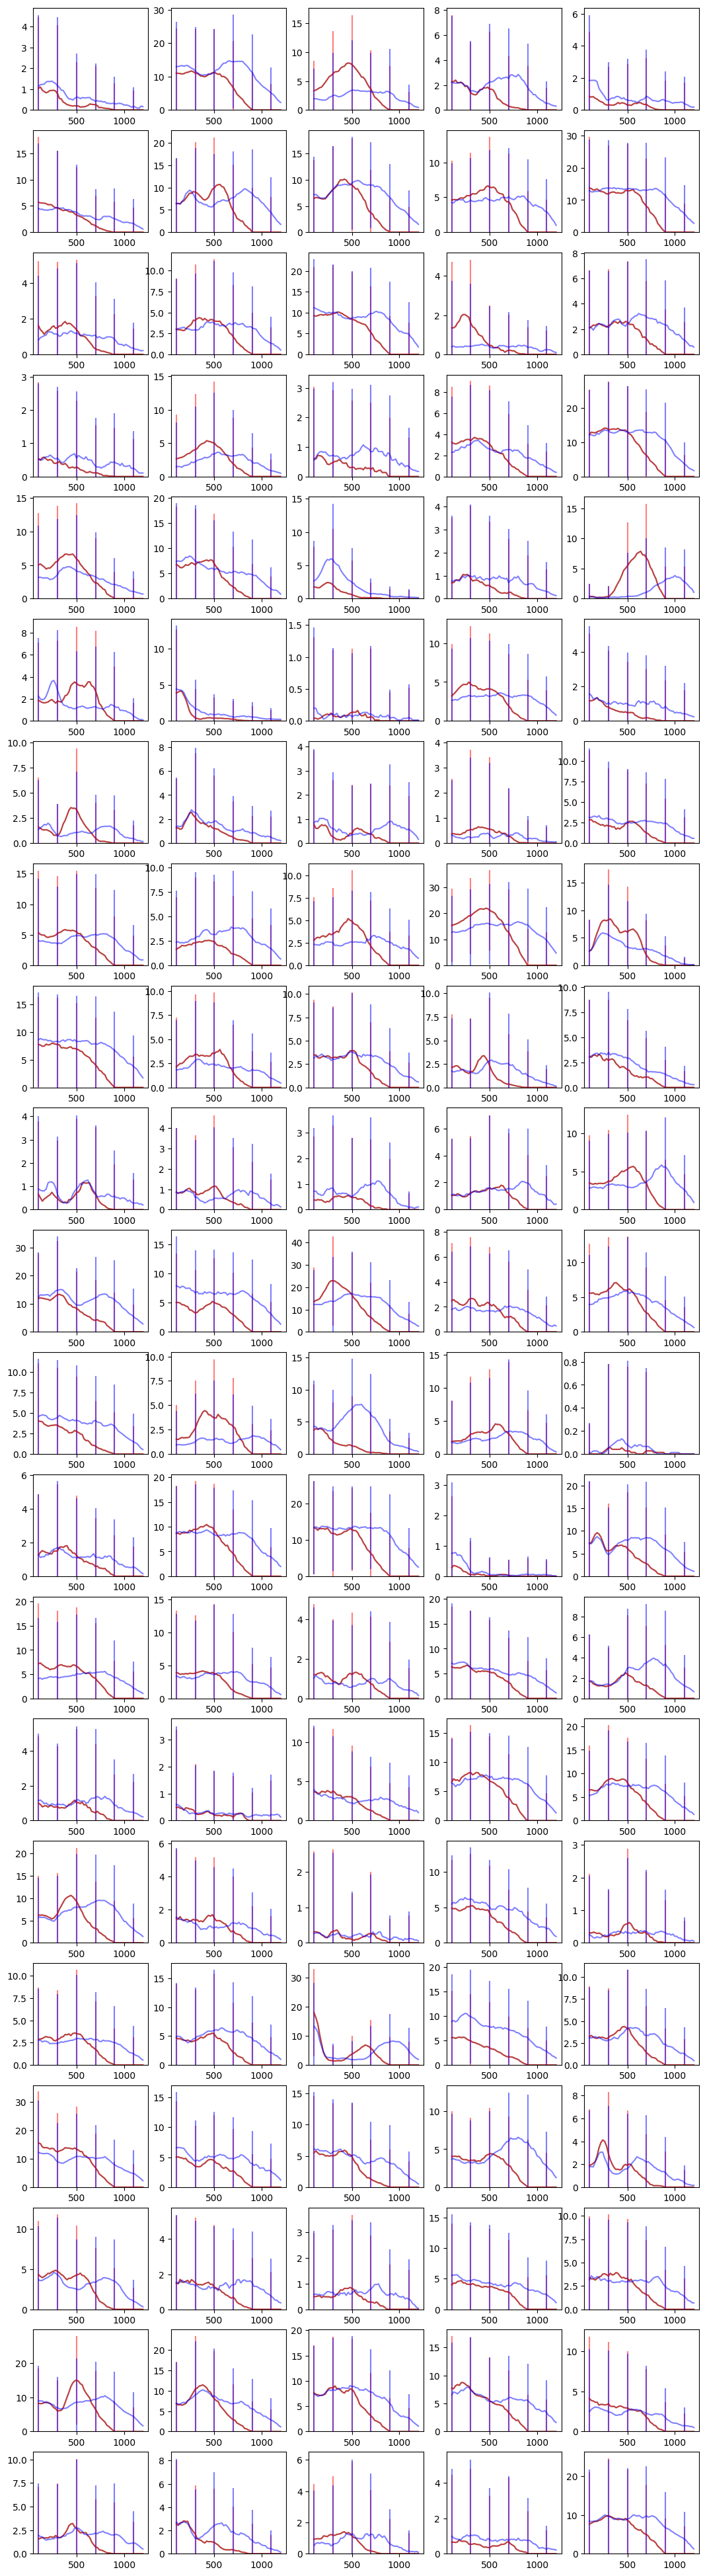

In [69]:
N_neurons_cols = int(np.sqrt(N_neurons)/2)
fig, axs = plt.subplots(N_neurons//N_neurons_cols, N_neurons_cols, figsize=(13, 5*N_neurons_sqrt))
for i_neuron, ax in enumerate(axs.ravel()):
    ax.plot(timepoints, np.nanmean(fr[:, i_neuron, id_short==True], axis=-1), 'k', alpha=.5)
    ax.errorbar(timepoints, np.nanmean(fr[:, i_neuron, id_short==True], axis=-1),
                yerr=np.nanstd(fr[:, i_neuron, :], axis=-1), errorevery=10, color='r', alpha=.5)
    ax.errorbar(timepoints, np.nanmean(fr[:, i_neuron, id_short==False], axis=-1),
                yerr=np.nanstd(fr[:, i_neuron, :], axis=-1), errorevery=10, color='b', alpha=.5)
    ax.set_ylim(0)